# Career Foundry 6.4 

In [33]:
# Importing Libaries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# Matplot
%matplotlib inline 

In [35]:
# Uploading data
df = pd.read_csv('/Users/katiejogoyal/Desktop/Career Foundry 6/6.1 Data/SS_file.csv')

In [36]:
# Show Data
df.head()

Segment        Country             City       State  Postal Code Region  \
0   Consumer  United States        Henderson    Kentucky        42420  South   
1   Consumer  United States        Henderson    Kentucky        42420  South   
2  Corporate  United States      Los Angeles  California        90036   West   
3   Consumer  United States  Fort Lauderdale     Florida        33311  South   
4   Consumer  United States  Fort Lauderdale     Florida        33311  South   

          Category Sub-Category     Sales  Quantity  Discount   Profits  \
0        Furniture    Bookcases  261.9600         2      0.00   41.9136   
1        Furniture       Chairs  731.9400         3      0.00  219.5820   
2  Office Supplies       Labels   14.6200         2      0.00    6.8714   
3        Furniture       Tables  957.5775         5      0.45 -383.0310   
4  Office Supplies      Storage   22.3680         2      0.20    2.5164   

   Cluster  
0        0  
1        0  
2        2  
3        1  
4        0

In [37]:
# Display the shape of the data
df.shape

(9994, 13)

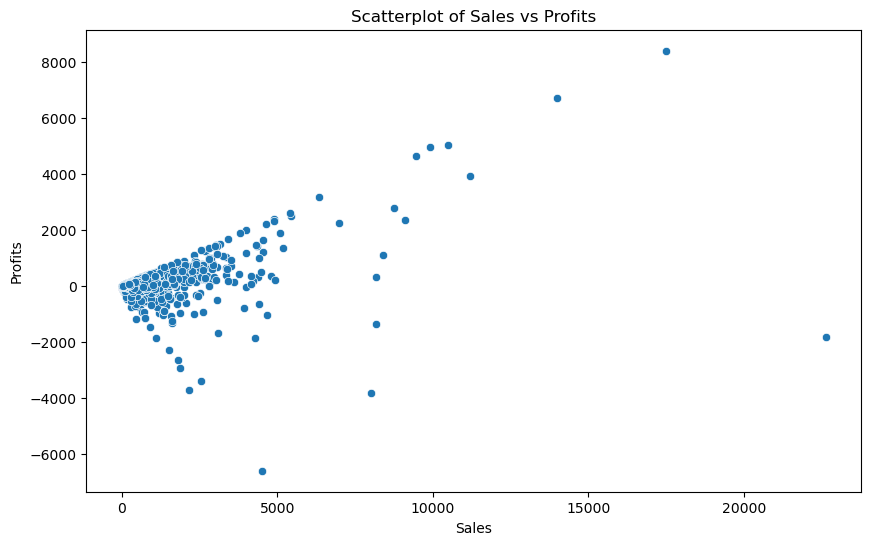

In [38]:
# Scatterplot 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profits')
plt.title('Scatterplot of Sales vs Profits')
plt.xlabel('Sales')
plt.ylabel('Profits')
plt.show()

# Hypothesis 
There is a positive correlation between sales and profits, such that as sales increase, profits also tend to increase. However, there are some cases where large sales are associated with negative profits.



In [15]:
# Define X (independent variable) and y (dependent variable)
X = df[['Sales']]  # Feature
y = df['Profits']  # Target


In [16]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [19]:
# Create a linear regression model
model = LinearRegression()

In [20]:
# Train (fit) the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Make predictions on the test set
y_pred = model.predict(X_test)

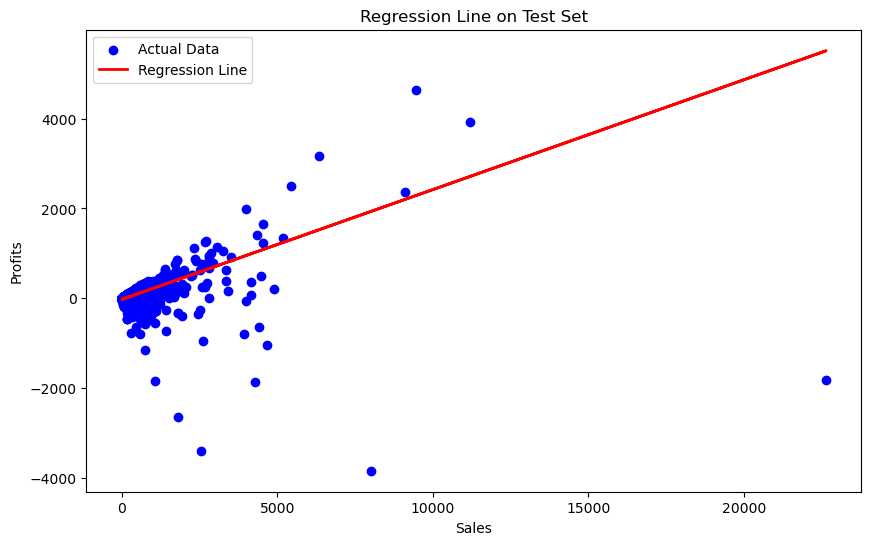

In [22]:
# Plot scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')  # Actual test data points
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')  # Regression line
plt.title('Regression Line on Test Set')
plt.xlabel('Sales')  # X-axis label
plt.ylabel('Profits')  # Y-axis label
plt.legend()

# Observations
The regression line shows a positive correlation between sales and profits with a few outliers. As well as the chart indicates that higher sales tend to lead to higher profits. 

In [25]:
# Calculate Mean Squared Error (MSE) and R2 Score
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 61502.734965190335
R² Score: -0.14925790348429202


In [32]:
# Create a new DataFrame for the test data with predictions
comparison_df = pd.DataFrame({
    'Sales': X_test.values.ravel(),  # Use .values.ravel() to flatten the DataFrame
    'Actual_Profits': y_test,
    'Predicted_Profits': y_pred
})

# Display the comparison DataFrame
print(comparison_df.head())

        Sales  Actual_Profits  Predicted_Profits
3125  563.808         21.1428         112.033362
1441   36.672         11.4600         -16.948679
4510   37.300         17.1580         -16.795017
39    212.058        -15.1470          25.965567
4509  171.288         -6.4233          15.989778


# Thoughts on how the Modle Preformed 
The model shows significant differences between predicted and actual profits, indicating large prediction errors in certain cases. The discrepancies suggest the model might be underfitting or overfitting, failing to capture the underlying trends or struggling to generalize to new data. Further tuning, feature engineering, or trying different models and optimization techniques is necessary to improve its predictive performance.